In [ ]:
!pip install nltk



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk 
from nltk import ngrams
from collections import Counter

In [4]:
df = pd.read_csv('IMDB Dataset.csv')

df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [18]:
df["review"] = df["review"].str.replace(r"<.*?>", "", regex=True)


df

,review,sentiment,caracteres,num_caracteres,bi_grams,comums_bi_grams
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...",301,"[(One, of), (of, the), (the, other), (other, r...","[((of, the), 4), ((to, the), 3), ((this, is), ..."
1,A wonderful little production. The filming tec...,positive,"[A, wonderful, little, production., The, filmi...",156,"[(A, wonderful), (wonderful, little), (little,...","[((<br, /><br), 3), ((/><br, />The), 3), ((not..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...",162,"[(I, thought), (thought, this), (this, was), (...","[((I, thought), 2), ((it, was), 2), ((/><br, /..."
3,Basically there's a family where a little boy ...,negative,"[Basically, there's, a, family, where, a, litt...",132,"[(Basically, there's), (there's, a), (a, famil...","[((there's, a), 2), ((his, closet), 2), ((all,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei's, ""Love, in, the, Time, of, M...",222,"[(Petter, Mattei's), (Mattei's, ""Love), (""Love...","[((in, the), 3), ((is, a), 2), ((Mr., Mattei),..."
...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[I, thought, this, movie, did, a, down, right,...",190,"[(I, thought), (thought, this), (this, movie),...","[((this, movie), 3), ((it, to), 2), ((the, mor..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[Bad, plot,, bad, dialogue,, bad, acting,, idi...",108,"[(Bad, plot,), (plot,, bad), (bad, dialogue,),...","[((Bad, plot,), 1), ((plot,, bad), 1), ((bad, ..."
49997,I am a Catholic taught in parochial elementary...,negative,"[I, am, a, Catholic, taught, in, parochial, el...",226,"[(I, am), (am, a), (a, Catholic), (Catholic, t...","[((and, the), 3), ((of, the), 3), ((tragedy, o..."
49998,I'm going to have to disagree with the previou...,negative,"[I'm, going, to, have, to, disagree, with, the...",212,"[(I'm, going), (going, to), (to, have), (have,...","[((and, the), 3), ((of, the), 2), ((to, be), 2..."


In [24]:
# Remover resíduos específicos de tags HTML que ficaram após o regex
df["review"] = df["review"].str.replace('<br', '', regex=False)
df["review"] = df["review"].str.replace('/><br', '', regex=False)
df["review"] = df["review"].str.replace('/>', '', regex=False)


In [25]:
# Verifique se ainda há tags HTML ou resíduos nas reviews
import re
exemplo_tags = df["review"].apply(lambda x: re.findall(r"<.*?>", x))
print(exemplo_tags[exemplo_tags.apply(len) > 0])


Series([], Name: review, dtype: object)


In [26]:
df["caracteres"] = df["review"].str.split()
df["num_caracteres"] = df["caracteres"].apply(len)

In [27]:
df

,review,sentiment,caracteres,num_caracteres,bi_grams,comums_bi_grams
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...",301,"[(One, of), (of, the), (the, other), (other, r...","[((of, the), 4), ((to, the), 3), ((this, is), ..."
1,A wonderful little production. The filming tec...,positive,"[A, wonderful, little, production., The, filmi...",156,"[(A, wonderful), (wonderful, little), (little,...","[((<br, /><br), 3), ((/><br, />The), 3), ((not..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...",162,"[(I, thought), (thought, this), (this, was), (...","[((I, thought), 2), ((it, was), 2), ((/><br, /..."
3,Basically there's a family where a little boy ...,negative,"[Basically, there's, a, family, where, a, litt...",132,"[(Basically, there's), (there's, a), (a, famil...","[((there's, a), 2), ((his, closet), 2), ((all,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei's, ""Love, in, the, Time, of, M...",222,"[(Petter, Mattei's), (Mattei's, ""Love), (""Love...","[((in, the), 3), ((is, a), 2), ((Mr., Mattei),..."
...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[I, thought, this, movie, did, a, down, right,...",190,"[(I, thought), (thought, this), (this, movie),...","[((this, movie), 3), ((it, to), 2), ((the, mor..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[Bad, plot,, bad, dialogue,, bad, acting,, idi...",108,"[(Bad, plot,), (plot,, bad), (bad, dialogue,),...","[((Bad, plot,), 1), ((plot,, bad), 1), ((bad, ..."
49997,I am a Catholic taught in parochial elementary...,negative,"[I, am, a, Catholic, taught, in, parochial, el...",226,"[(I, am), (am, a), (a, Catholic), (Catholic, t...","[((and, the), 3), ((of, the), 3), ((tragedy, o..."
49998,I'm going to have to disagree with the previou...,negative,"[I'm, going, to, have, to, disagree, with, the...",212,"[(I'm, going), (going, to), (to, have), (have,...","[((and, the), 3), ((of, the), 2), ((to, be), 2..."


In [14]:
df.describe()

,num_caracteres
count,50000.000000
mean,227.112080
std,168.275619
min,4.000000
25%,124.000000
50%,170.000000
75%,275.000000
max,2450.000000


In [21]:
df["bi_grams"] = (df["caracteres"].apply(lambda x: list(ngrams(x, 2))))


todos_bigrams = [bigram for lista in df["bi_grams"] for bigram in lista]

# Conta os bigramas mais comuns PERCEB QUE EU TENHO MUITAS STOPWORDS AO INVÉS DE PALAVRAS REAIS IREMOS VER ISSO APÓS O TRATAENTO
count = Counter(todos_bigrams)
print(count.most_common(10))



[(('of', 'the'), 74970), (('in', 'the'), 45938), (('is', 'a'), 25709), (('and', 'the'), 23642), (('to', 'the'), 23037), (('to', 'be'), 22023), (('this', 'movie'), 17586), (('in', 'a'), 16542), (('on', 'the'), 16255), (('of', 'a'), 15299)]


In [40]:
df

,review,sentiment,caracteres,num_caracteres,bi_grams,comums_bi_grams
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...",301,"[(One, of), (of, the), (the, other), (other, r...","[((of, the), 4), ((to, the), 3), ((this, is), ..."
1,A wonderful little production. The filming tec...,positive,"[A, wonderful, little, production., The, filmi...",156,"[(A, wonderful), (wonderful, little), (little,...","[((<br, /><br), 3), ((/><br, />The), 3), ((not..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...",162,"[(I, thought), (thought, this), (this, was), (...","[((I, thought), 2), ((it, was), 2), ((/><br, /..."
3,Basically there's a family where a little boy ...,negative,"[Basically, there's, a, family, where, a, litt...",132,"[(Basically, there's), (there's, a), (a, famil...","[((there's, a), 2), ((his, closet), 2), ((all,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei's, ""Love, in, the, Time, of, M...",222,"[(Petter, Mattei's), (Mattei's, ""Love), (""Love...","[((in, the), 3), ((is, a), 2), ((Mr., Mattei),..."
...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[I, thought, this, movie, did, a, down, right,...",190,"[(I, thought), (thought, this), (this, movie),...","[((this, movie), 3), ((it, to), 2), ((the, mor..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[Bad, plot,, bad, dialogue,, bad, acting,, idi...",108,"[(Bad, plot,), (plot,, bad), (bad, dialogue,),...","[((Bad, plot,), 1), ((plot,, bad), 1), ((bad, ..."
49997,I am a Catholic taught in parochial elementary...,negative,"[I, am, a, Catholic, taught, in, parochial, el...",226,"[(I, am), (am, a), (a, Catholic), (Catholic, t...","[((and, the), 3), ((of, the), 3), ((tragedy, o..."
49998,I'm going to have to disagree with the previou...,negative,"[I'm, going, to, have, to, disagree, with, the...",212,"[(I'm, going), (going, to), (to, have), (have,...","[((and, the), 3), ((of, the), 2), ((to, be), 2..."


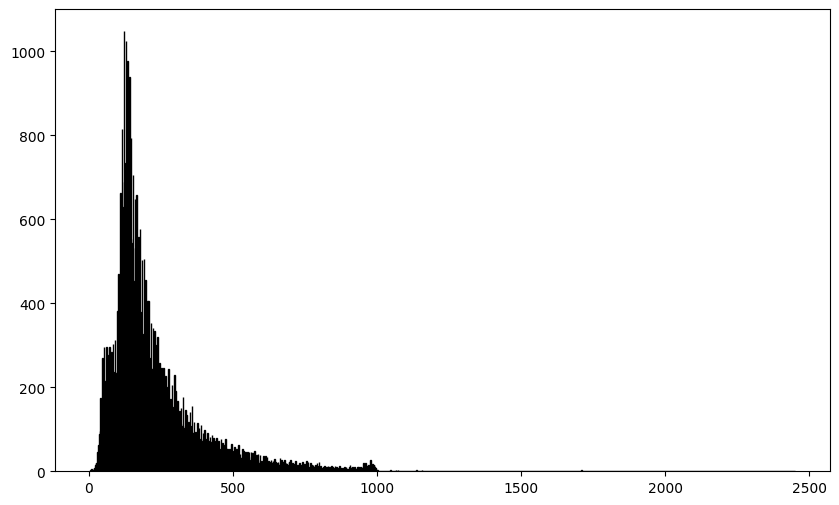

In [46]:
sizes = df["num_caracteres"].to_numpy()
num_bins = len(df["num_caracteres"].unique())
plt.figure(figsize=(10,6))
plt.hist(sizes, bins=num_bins, edgecolor='black')
plt.show()


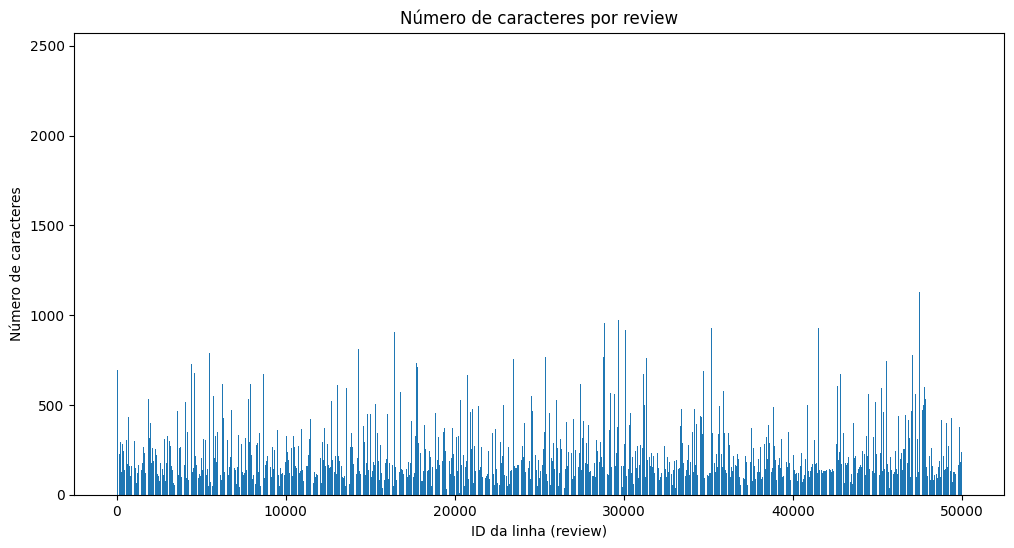

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(df.index, df["num_caracteres"])
plt.xlabel("ID da linha (review)")
plt.ylabel("Número de caracteres")
plt.title("Número de caracteres por review")
plt.show()

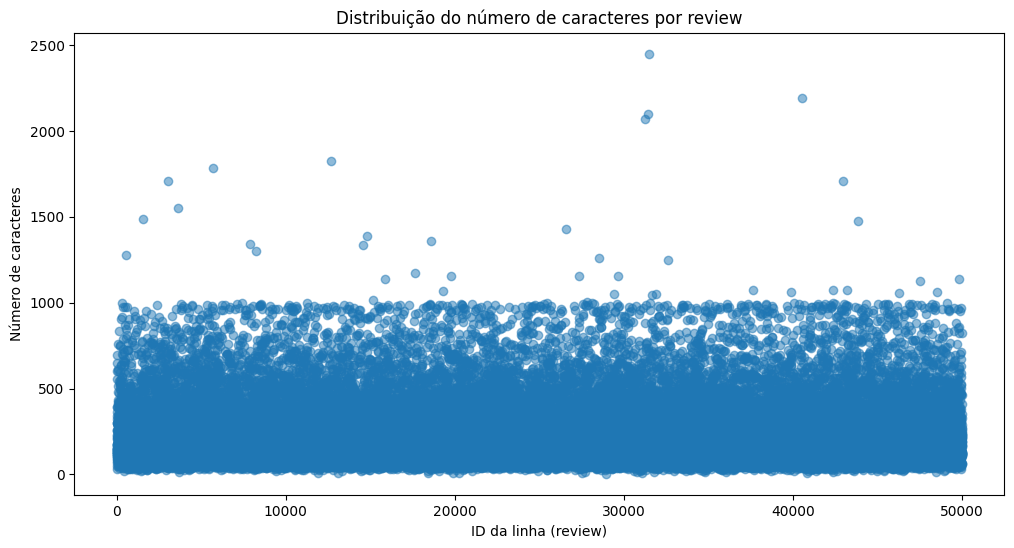

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df.index, df["num_caracteres"], alpha=0.5)
plt.xlabel("ID da linha (review)")
plt.ylabel("Número de caracteres")
plt.title("Distribuição do número de caracteres por review")
plt.show()

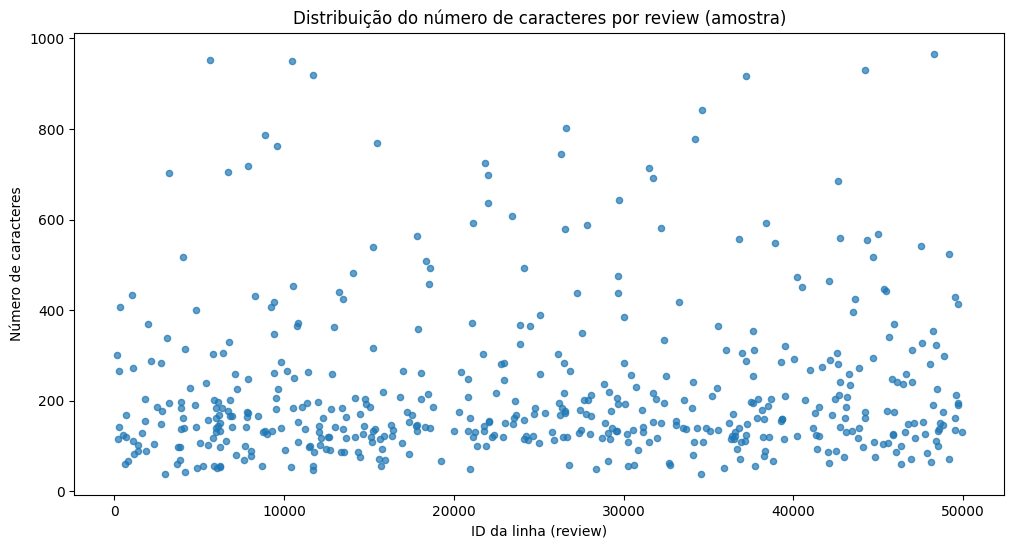

In [ ]:
amostra = df.sample(500, random_state=42)
plt.figure(figsize=(12,6))
plt.scatter(amostra.index, amostra["num_caracteres"], s=20, alpha=0.7)
plt.xlabel("ID da linha (review)")
plt.ylabel("Número de caracteres")
plt.title("Distribuição do número de caracteres por review (amostra)")
plt.show()